# CP321 Project (20 Marks)

Student #1:

Name:        Malika Sharma

Student ID:  210 - 37


Student #2:

Name:        Ruveyda Nur Kizmaz

Student ID:  210960430

### Introduction & Motivation

Introduction: xxx

Our Motivation:  xxxxxxx  20% of our mark is enough motivation to do this work

### Propose Approach

Our Question: What are the trends in student achievements for reading, writing, and mathematics in grades 3, 6, and 9 EQAO assessments across Ontario from 2021 to 2023?

Related Dataset:
https://data.ontario.ca/datasetschool-information-and-student-demographics 

Dataset Description:

Data Processing:     ??


In [8]:
# Our code starts from here

# Required downloads: to be able to open xlsx files:
# pip install openpyxl
# pip install seaborn


In [ ]:
""" 
Grouped Bar - Showing top 3 courses for enrollment 
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data = pd.read_excel('onlinelearnenrolbycrs_1415-2021_en (2).xlsx')
data = pd.read_excel('data/onlinelearnenrolbycrs_1415-2021_en.xlsx')  


data.replace('<10', 5, inplace=True)
data.fillna(0, inplace=True)

years_of_interest = ['2018-2019 Online Learning Course Enrolment Totals', 
                     '2019-2020 Online Learning Course Enrolment Totals', 
                     '2020-2021 Online Learning Course Enrolment Totals', 
                     '2021-2022 Online Learning Course Enrolment Totals']
for year in years_of_interest:
    data[year] = pd.to_numeric(data[year])

data = data[~data['Course Name'].str.contains('Provincial Total', na=False)]


top_courses = data.melt(id_vars='Course Name', value_vars=years_of_interest, var_name='Year', value_name='Enrollment')
top_courses = top_courses.groupby('Year').apply(lambda x: x.nlargest(3, 'Enrollment')).reset_index(drop=True)

unique_courses = top_courses['Course Name'].unique()
unique_years = top_courses['Year'].unique()

course_positions = np.arange(len(unique_courses))
bar_width = 0.15  


fig, ax = plt.subplots(figsize=(12, 7))  

unique_years = unique_years[-5:]  

for i, year in enumerate(unique_years):
    year_data = top_courses[top_courses['Year'] == year]
    ax.bar(course_positions + i * bar_width, year_data['Enrollment'], width=bar_width, label=year)

ax.set_xticks(course_positions + (len(unique_years) - 1) * bar_width / 2)
ax.set_xticklabels(unique_courses, rotation=45, ha='right')
ax.set_ylabel('Enrollment Totals')
ax.set_xlabel('Course Name')
ax.set_title('Top 3 Courses by Enrollment for Selected Years')
ax.legend(title='Year')

plt.tight_layout()
plt.show()

C:\Users\rnurk\AppData\Local\Temp\ipykernel_9944\2253675366.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('<10', 5, inplace=True)


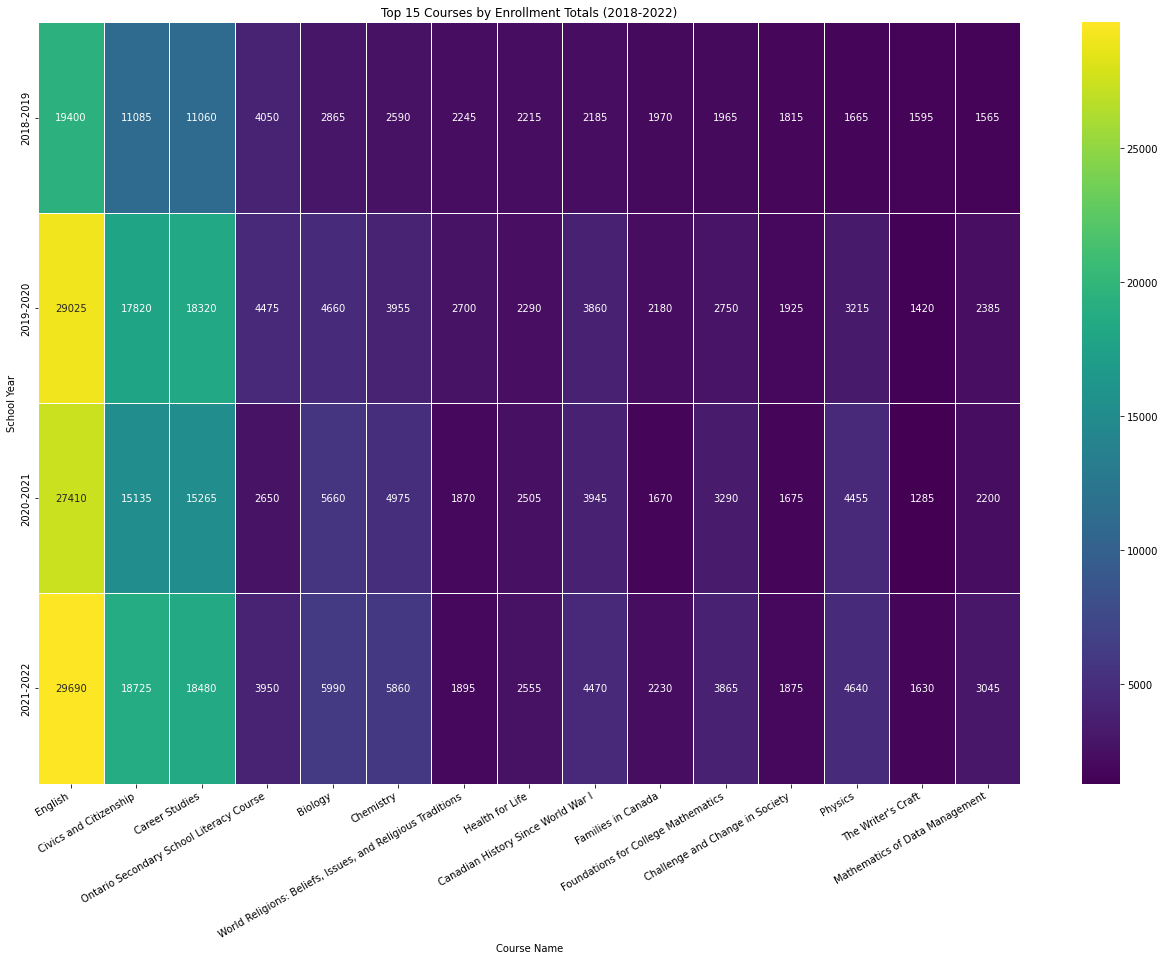

In [9]:
""" 
HeatMap - Showing top 15 courses for enrollment 
"""
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# data = pd.read_excel('onlinelearnenrolbycrs_1415-2021_en (2).xlsx')
data = pd.read_excel("data/onlinelearnenrolbycrs_1415-2021_en.xlsx")

data.replace('<10', 5, inplace=True)
data.fillna(0, inplace=True)
years_of_interest = [
    '2018-2019 Online Learning Course Enrolment Totals', 
    '2019-2020 Online Learning Course Enrolment Totals', 
    '2020-2021 Online Learning Course Enrolment Totals', 
    '2021-2022 Online Learning Course Enrolment Totals'
]
simple_years = ['2018-2019', '2019-2020', '2020-2021', '2021-2022']
data = data.rename(columns=dict(zip(years_of_interest, simple_years)))


for year in simple_years:
    data[year] = pd.to_numeric(data[year])


data = data[~data['Course Name'].str.contains('Provincial Total', na=False)]


enrollment_sums = data.groupby('Course Name')[simple_years].sum()
enrollment_sums = enrollment_sums.sort_values(by=simple_years, ascending=False)


top_enrollment_sums = enrollment_sums.head(15)


heatmap_data = top_enrollment_sums.T

plt.figure(figsize=(22, 14))
heatmap = sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='viridis', linewidths=.5)
heatmap.set_title('Top 15 Courses by Enrollment Totals (2018-2022)')
heatmap.set_ylabel('School Year')
heatmap.set_xlabel('Course Name')
plt.xticks(rotation=30, ha='right')  # Rotate course titles for better alignment

# Save the heatmap figure
heatmap_figure_path_aligned = 'top_15_courses_enrollment_heatmap_aligned.png'
plt.savefig(heatmap_figure_path_aligned)

plt.show()

C:\Users\rnurk\AppData\Local\Temp\ipykernel_9944\3282208569.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('<10', 5, inplace=True)


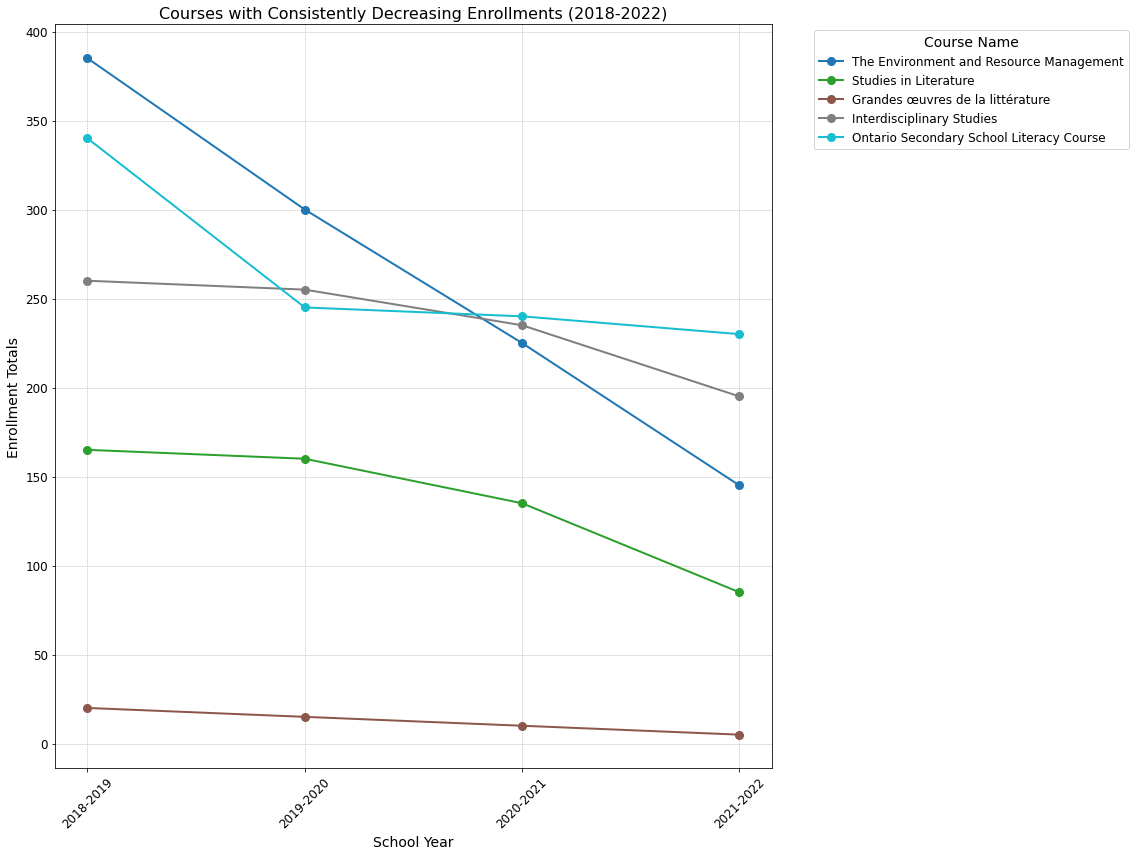

In [6]:
"""
LineChart - Showing courses with consistently decreasing enrollments 
"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data = pd.read_excel('onlinelearnenrolbycrs_1415-2021_en (2).xlsx')
data = pd.read_excel("data/onlinelearnenrolbycrs_1415-2021_en.xlsx")

data.replace('<10', 5, inplace=True)
data.fillna(0, inplace=True)
years_of_interest = [
    '2018-2019 Online Learning Course Enrolment Totals',
    '2019-2020 Online Learning Course Enrolment Totals',
    '2020-2021 Online Learning Course Enrolment Totals',
    '2021-2022 Online Learning Course Enrolment Totals'
]
for year in years_of_interest:
    data[year] = pd.to_numeric(data[year], errors='coerce')


data = data[~data['Course Name'].str.contains('Provincial Total', na=False)]
data = data[data[years_of_interest].sum(axis=1) > 0]


decreasing_enrollment_courses = data.loc[data[years_of_interest].diff(axis=1).dropna(axis=1).apply(lambda x: (x < 0).all(), axis=1)]
filtered_courses = decreasing_enrollment_courses[~(decreasing_enrollment_courses[years_of_interest] == 0).any(axis=1)]
filtered_courses.set_index('Course Name', inplace=True)


plt.figure(figsize=(16, 12))
colors = plt.cm.tab10(np.linspace(0, 1, len(filtered_courses.index)))

simple_years = ['2018-2019', '2019-2020', '2020-2021', '2021-2022']
for course, color in zip(filtered_courses.index, colors):
    plt.plot(simple_years, filtered_courses.loc[course, years_of_interest], marker='o', label=course, linewidth=2, markersize=8, color=color)

plt.title('Courses with Consistently Decreasing Enrollments (2018-2022)', fontsize=16)
plt.xlabel('School Year', fontsize=14)
plt.ylabel('Enrollment Totals', fontsize=14)
plt.xticks(simple_years, rotation=45, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Course Name', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12, title_fontsize=14)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()

plt.show()

C:\Users\rnurk\AppData\Local\Temp\ipykernel_9944\3568194642.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace('<10', 5, inplace=True)
C:\Users\rnurk\AppData\Local\Temp\ipykernel_9944\3568194642.py:34: FutureWarning: The provided callable <function sum at 0x000002367B90FD30> is currently using DataFrameGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  pivot_data = selected_courses_data.pivot_table(index='Course Code', values=years_of_interest, aggfunc=np.sum)


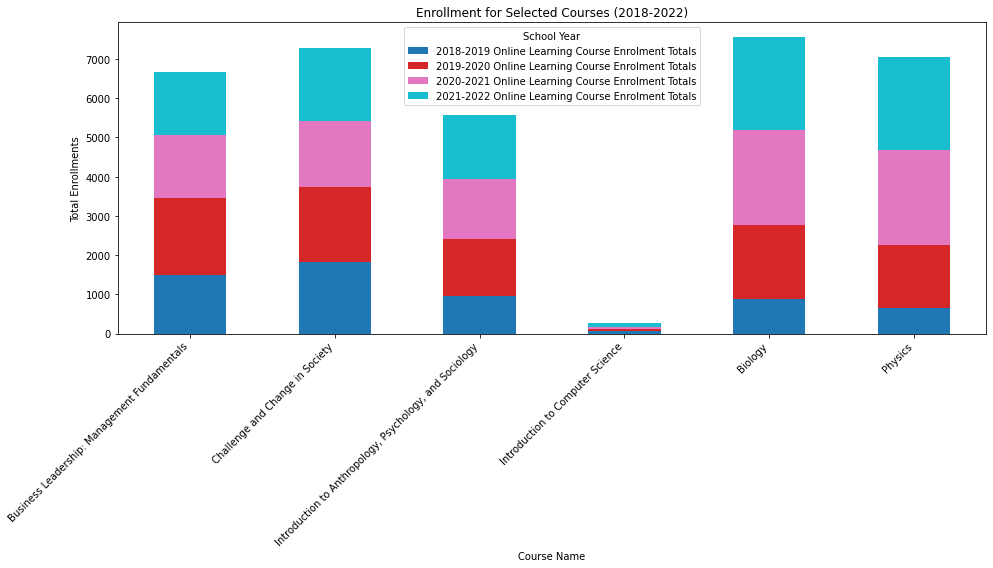

In [7]:
"""
StackedBarChart - Showing broader categories of courses to see students' interests. (Courses that are not mandatory for everyone to take) 

"""
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# data = pd.read_excel('onlinelearnenrolbycrs_1415-2021_en (2).xlsx') 
data = pd.read_excel("data/onlinelearnenrolbycrs_1415-2021_en.xlsx")

data.replace('<10', 5, inplace=True)
data.fillna(0, inplace=True)
years_of_interest = ['2018-2019 Online Learning Course Enrolment Totals', 
                     '2019-2020 Online Learning Course Enrolment Totals', 
                     '2020-2021 Online Learning Course Enrolment Totals', 
                     '2021-2022 Online Learning Course Enrolment Totals']
for year in years_of_interest:
    data[year] = pd.to_numeric(data[year], errors='coerce')


course_map = {
    'HSP3U': 'Introduction to Anthropology, Psychology, and Sociology',
    'ICS3C': 'Introduction to Computer Science',
    'BOH4M': 'Business Leadership: Management Fundamentals',
    'SPH3U': 'Physics',
    'SBI3U': 'Biology',
    'HSB4U': 'Challenge and Change in Society'
}


selected_courses_data = data[data['Course Code'].isin(course_map.keys())]

pivot_data = selected_courses_data.pivot_table(index='Course Code', values=years_of_interest, aggfunc=np.sum)


pivot_data.index = pivot_data.index.map(course_map)


pivot_data.plot(kind='bar', stacked=True, figsize=(14, 8), colormap='tab10')
plt.title('Enrollment for Selected Courses (2018-2022)')
plt.ylabel('Total Enrollments')
plt.xlabel('Course Name')
plt.xticks(rotation=45, ha="right")
plt.legend(title='School Year')
plt.tight_layout()
plt.show()